<a href="https://colab.research.google.com/github/engronaldmanoel/Predictive-Maintenance-Forecast/blob/main/%5BProject%5D_Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Maintenance⚙️
**Informations about the Dataset**📁

Machine Predictive Maintenance classification Dataset Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.💡

The dataset consists of 10.000 data points stored as rows with 14 features in columns

Acknowledgements UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

<p align="center"><img src="https://user-images.githubusercontent.com/100495133/210454365-a283abb1-17e4-48c9-bc18-a61dea3c706b.jpg" height="250px"></p>




✅ The first step is to import the libraries that will be used in the research, the initial part of the code was dedicated to these imports as a way to improve the visualization of what was used in the project

> Next to each import is the reason why it is being used in the project.

In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd # For handling data, which for this project are in .csv format
import matplotlib.pyplot as plt # Used for graph plotting, it was used because its syntax is very simple
import seaborn as sns # Graph plotting with more visuals
import numpy as np # For checking the average and other statistical information
from sklearn.preprocessing import LabelEncoder # Transformations of categorical variables into numerical ones
from sklearn.model_selection import train_test_split # Split data between training and testing for model training with machine learning algorithm
from sklearn.model_selection import KFold # Used in cross-validation in the division of lines for validation
from sklearn.model_selection import RepeatedKFold # To shorten the code used in Kfold
from sklearn.ensemble import RandomForestClassifier # Supervised Learning Classification Model
from sklearn.metrics import classification_report # The metric used to check the performance of the model
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score # One more metric that will be used for model validation
import plotly.express as px # Interactive chart plotting
from imblearn.under_sampling import RandomUnderSampler # Reduces the scale of the majority classes
from sklearn.preprocessing import StandardScaler # Standardization of a class
import scikitplot as skplt # For plotting the confusion matrix

⬜ Therefore, a command will be used to import the dataset from my Google Drive account 🔳

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Maintenance_Predictive/predictive_maintenance.csv")

With `df.shape` it is important for us to know the **dimensions of the dataset** with this it is possible to know how this data will be processed, taking into account the operating hardware



In [5]:
df.shape

(10000, 10)

🔬 Another important step is the identification of the variables, so that some insight or hypothesis can emerge that can be validated as the research progresses.

In [6]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

**🗃️ These are the meanings of each variable in this dataset:**

`UID:` unique identifier ranging from 1 to 10000

`productID:` consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number.

`air temperature [K]:` generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

`process temperature [K]:` generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

`rotational speed [rpm]:`calculated from powepower of 2860 W, overlaid with a normally distributed noise

`torque [Nm]:` torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.

`tool wear [min]:` The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.



---



> Checking if `Target == 0` means **only** doesn't fail or if there is any category attached to that variable

In [7]:
df.query('Target == 0')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


🎯 Defining the `df_verif` variable as a **filtered variable** with the failed equipment and it was found that it has another category linked to `class 0`, that being `Random Failures`

In [8]:
df_verif = df.query('Target == 0')

In [9]:
df_verif['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

With that, the next step is to quantitatively analyze the types of failures and we come to the following conclusion that there are 5 types of failures and most of the dataset is composed of equipment without failures.

In [10]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

So let's do one more check to have other important information in the dataset, so with the `isnull()` command we will know how many **values are missing.**

In [11]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

> The dataset has 0% missing values, information that leads us to think that the data is showing us precisely what we want to look for



---

Now a statistical analysis will be made of the variables present in the dataset where values such as mean, median, maximum and minimum value help us to identify any discrepancy in the data


In [12]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000




> The values don't look too far from each other, so it's interesting to keep this format when training and validating the machine learning model

🚧 To better observe the distribution of variables as a whole, I decided to plot a `pairplot ` below to observe how equipment that has a fault behaves in relation to those that do not.

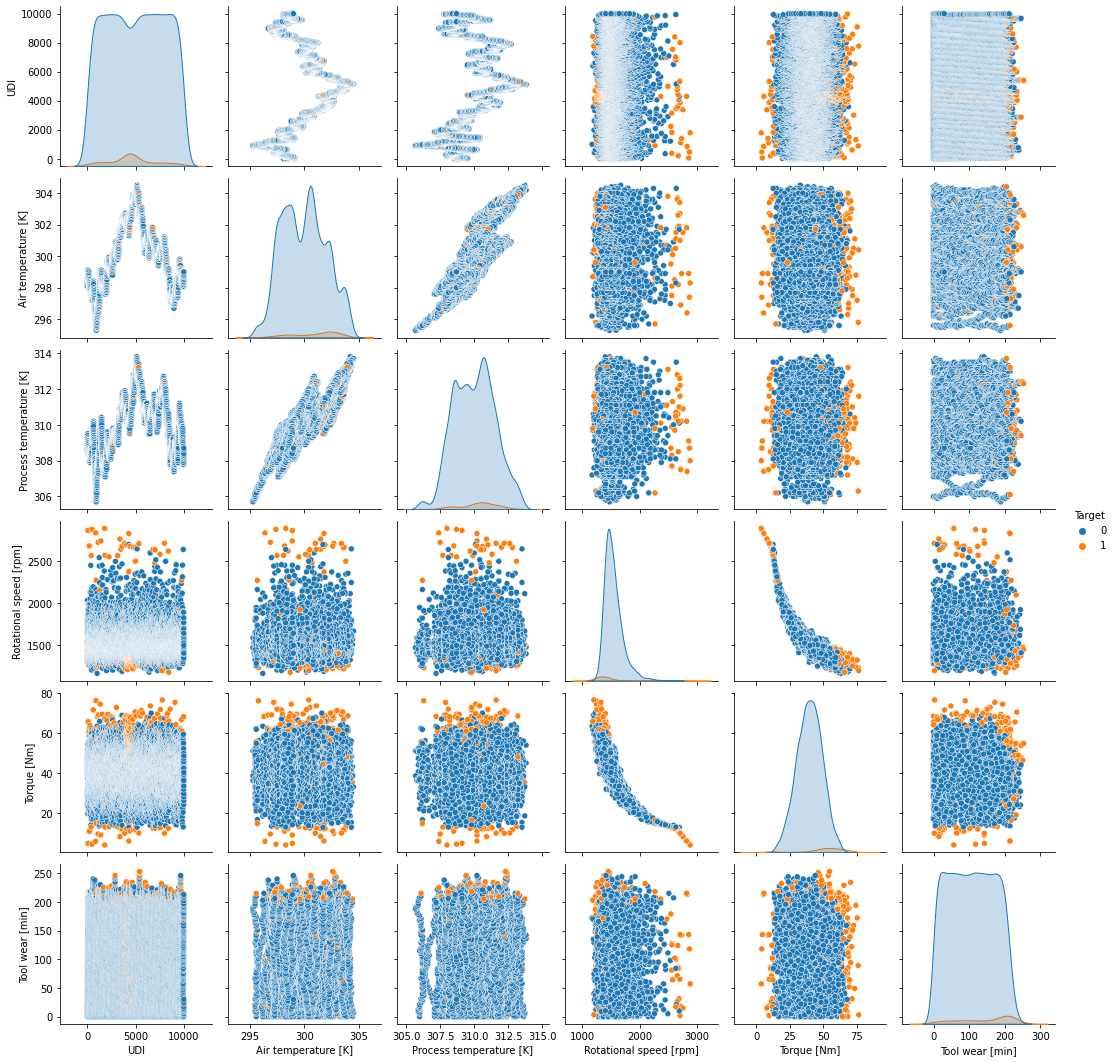

In [13]:
sns.pairplot(df, hue='Target')

> It is possible to observe that there are quite distant values between equipment that has a failure and those that do not, this is due to the imbalance of the problematic dataset that will be addressed later ...

Below, plot several histogram-type graphs to better analyze the frequency distribution of the dataset.

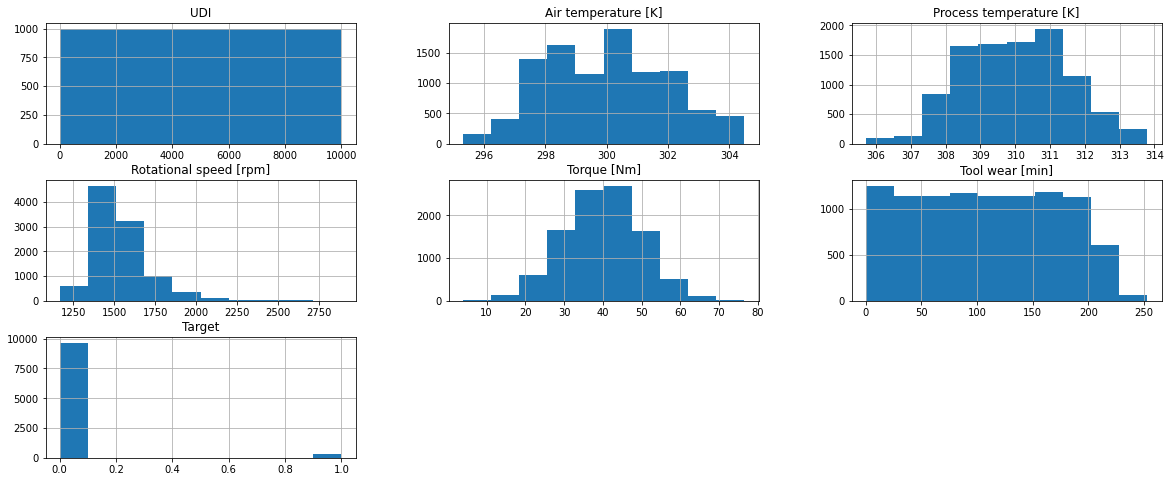

In [14]:
df.hist(figsize=(20,8))
sns.set()

🔎 Previously it was counted how many types of failures existed for each equipment, however it is interesting to plot with the summed values and graphically analyze what happens

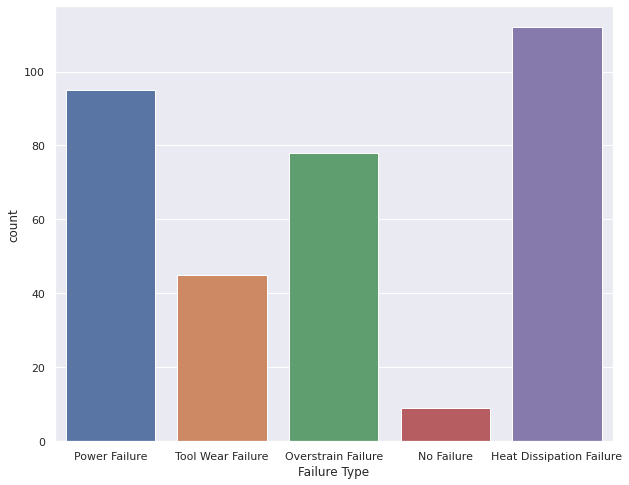

In [15]:
plt.figure(figsize = (10, 8))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type");

> With this, we can see mainly in the density graph that the data are quite unbalanced, to prove the effectiveness of a good balance, two classification models will be made using the same Machine Learning algorithm to understand how the model behaves.




It is also interesting to get some information on correlated variables and with the plotting of the bar chart we can observe the following...

In [16]:
group_fail = df.groupby('Failure Type').agg({'Air temperature [K]': np.sum}).reset_index() 

px.bar(group_fail, x = 'Failure Type', y =  'Air temperature [K]', text_auto='.2s')



> In a first view interpretation, it would be acceptable to think that the air temperature is much higher in equipment without failures. Which can lead to wrong conclusions regarding the dataset. As the data are not balanced, we could say that it would be a coincidence, so it would be correct to say that the increase in air temperature is linked to the failure of the equipment. Knowing the imbalance, this hypothesis loses its meaning because **only 3.5% of the dataset** is composed of faulty equipment.





---

We can plot a bar graph to see which type of equipment has **greater torque** regardless of faults

In [17]:
group_type = df.groupby('Type').agg({'Torque [Nm]': np.sum}).reset_index() 

px.bar(group_type, x = 'Type', y =  'Torque [Nm]', text_auto='.2s')


With this information, it is possible to verify which brand owns
Improved disc rotation efficiency



---

With this, we are going to check the correlation between the variables of the dataset, for that all the variables of the dataset were submitted to the `.corr()` method in which it organizes the features crossing information to return a correlation value that is presented through a graph of heat.

In [18]:
corr = df[['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type']].corr()


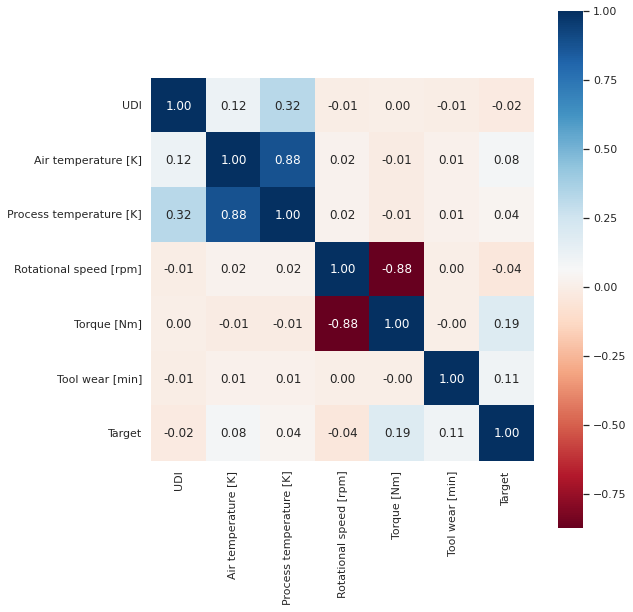

In [19]:
fig, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.tight_layout();


> We can observe little correlation with the `Target` variable, this is the first red flag to take into account when forwarding to the machine learning model

## 🎯 Váriavel Target 
🏷️To deal with the categorical features I chose to insert a new column and every time the failure is positive the value will be 1

In [20]:
df['No Failure'] = df['Failure Type'].str.contains("No Failure").astype(int)
df['Heat Dissipation Failure'] = df["Failure Type"].str.contains("Heat Dissipation Failure").astype(int)
df['Power Failure'] = df['Failure Type'].str.contains("Power Failure").astype(int)
df['Overstrain Failure'] = df['Failure Type'].str.contains("Overstrain Failure").astype(int)
df['Tool Wear Failure'] = df['Failure Type'].str.contains("Tool Wear Failure").astype(int)
df['Random Failures'] = df['Failure Type'].str.contains("Random Failures").astype(int)

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,No Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Tool Wear Failure,Random Failures
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,1,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,1,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,1,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,1,0,0,0,0,0


> The machine learning algorithm only understands numerical values, the **Label Encoder** could also be used to make this distribution, however I chose to do it this way because there are few features to transform and I like this organization.

In [21]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,No Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Tool Wear Failure,Random Failures
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,1,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,1,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,1,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,1,0,0,0,0,0


> By applying the Label Encoder to the `Product ID` variable we noticed the difference in how the inputs were transformed.



In [22]:
le = LabelEncoder()
df['Product ID'] = le.fit_transform(df['Product ID'])

df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,No Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Tool Wear Failure,Random Failures
0,1,7003,M,298.1,308.6,1551,42.8,0,0,No Failure,1,0,0,0,0,0
1,2,1003,L,298.2,308.7,1408,46.3,3,0,No Failure,1,0,0,0,0,0
2,3,1004,L,298.1,308.5,1498,49.4,5,0,No Failure,1,0,0,0,0,0
3,4,1005,L,298.2,308.6,1433,39.5,7,0,No Failure,1,0,0,0,0,0
4,5,1006,L,298.2,308.7,1408,40.0,9,0,No Failure,1,0,0,0,0,0


From there, the variable verification process will be carried out in order to find correlations between them.

In [23]:
corr = df[['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'No Failure',
       'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure',
       'Tool Wear Failure', 'Random Failures']].corr()

With the addition of new variables that were previously categorical and are now numerical, we will repeat the process of plotting a heatmap to verify some correlations.

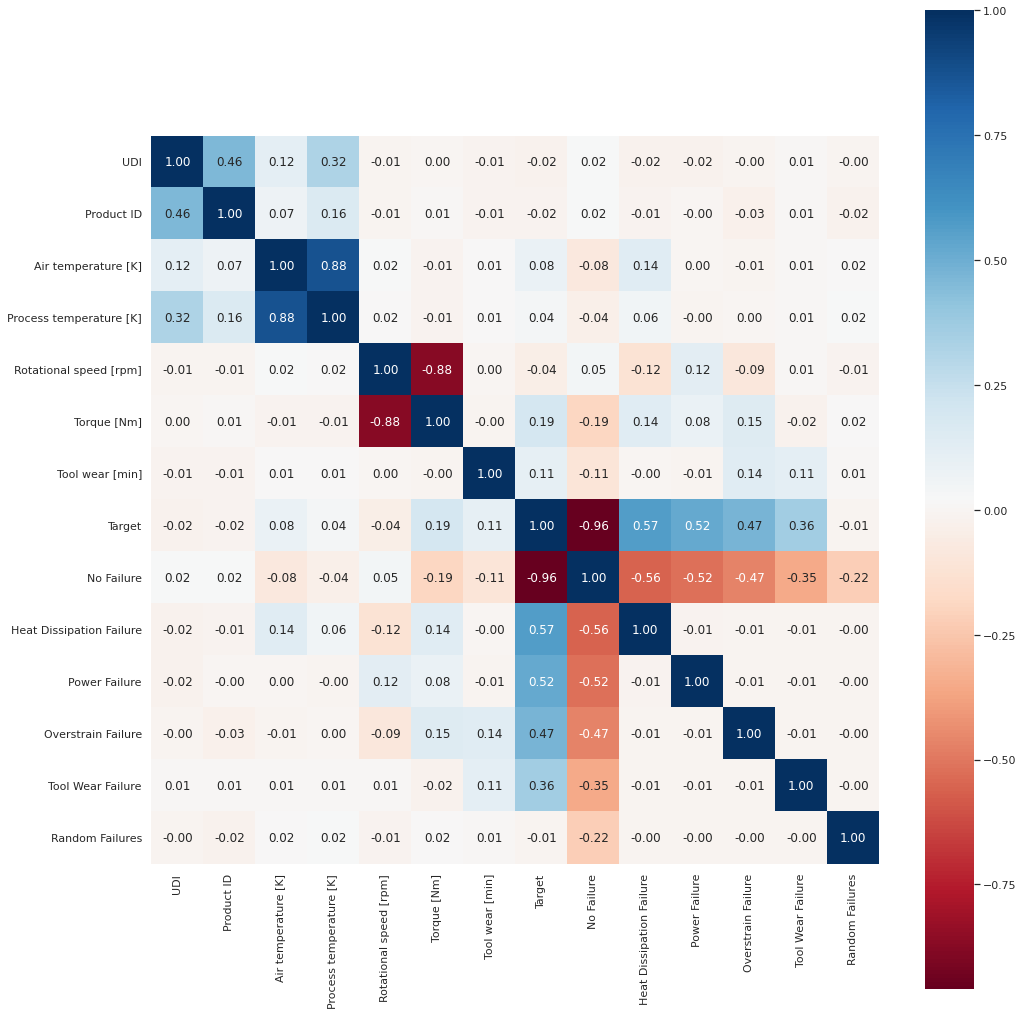

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.tight_layout();

### ⛰️ General Distribution

🌌Here it is interesting to plot a histogram for all variables in order to identify anything that may have been left out.

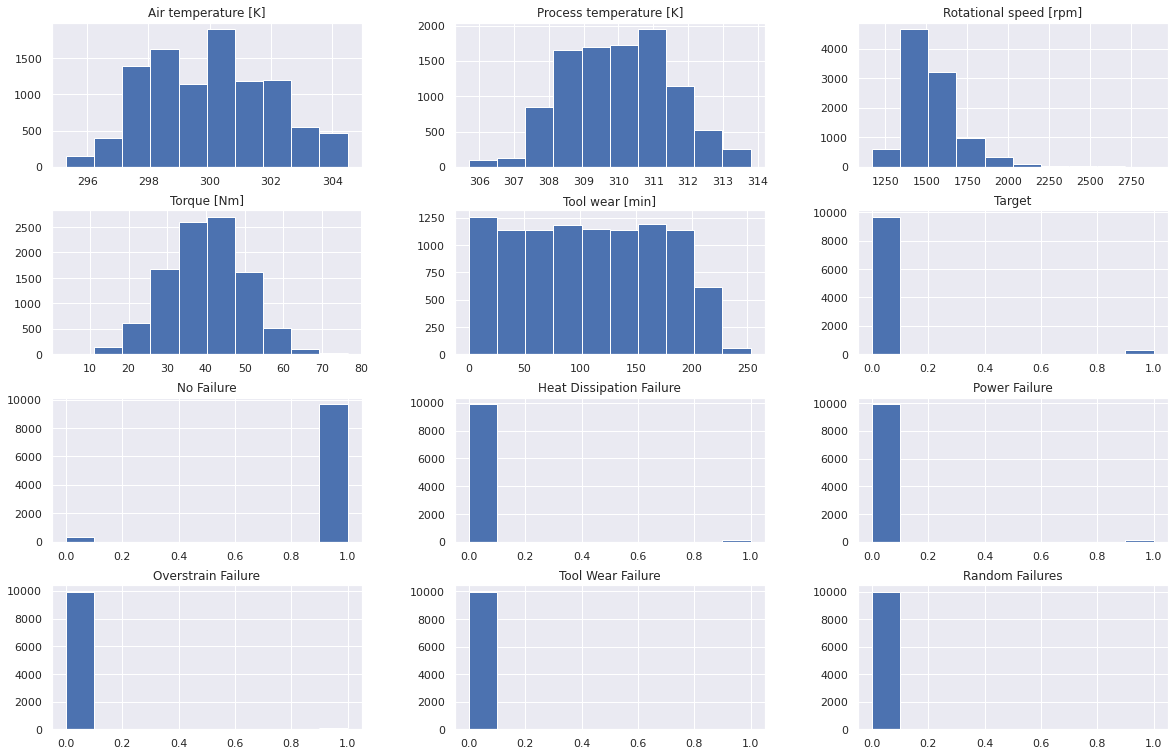

In [25]:
df[['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'No Failure',
       'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure',
       'Tool Wear Failure', 'Random Failures']].hist(figsize=(20,13))
       
plt.tight_layout;

## 🔩 First Test of Machine Learning
💡 Without the use of standardization to prove the error it will generate if it is not standardized.


In [26]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,No Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Tool Wear Failure,Random Failures
0,1,7003,M,298.1,308.6,1551,42.8,0,0,No Failure,1,0,0,0,0,0
1,2,1003,L,298.2,308.7,1408,46.3,3,0,No Failure,1,0,0,0,0,0
2,3,1004,L,298.1,308.5,1498,49.4,5,0,No Failure,1,0,0,0,0,0
3,4,1005,L,298.2,308.6,1433,39.5,7,0,No Failure,1,0,0,0,0,0
4,5,1006,L,298.2,308.7,1408,40.0,9,0,No Failure,1,0,0,0,0,0


Here below I defined a variable to receive all the columns of the dataset, so that I can divide the test training

In [27]:
variaveis = df[['Product ID','Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]',
       'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure',
       'Tool Wear Failure', 'Random Failures',
      ]]

In [28]:
X = variaveis
y= df['Target']

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [30]:
kf = KFold(3, shuffle=True, random_state=0)

📉 In this walkthrough, I will perform cross-validation to avoid overfitting my model.

In [31]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Validação', linhas_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_train, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_train, y_train)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acurácia", acc)

Treino 5000
Validação 5000

Acurácia 0.999
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.999
Treino 5000
Validação 5000

Acurácia 0.9984
Treino 5000
Validação 5000

Acurácia 0.9998
Treino 5000
Validação 5000

Acurácia 0.999
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9988
Treino 5000
Validação 5000

Acurácia 0.9994
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.999
Treino 5000
Validação 5000

Acurácia 0.9986
Treino 5000
Validação 5000

Acurácia 0.9996
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.999
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.999
Treino 5000
Validação 5000

Acurácia 0.9994
Treino 5000
Validação 5000

Acurácia 0.9988


In [32]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


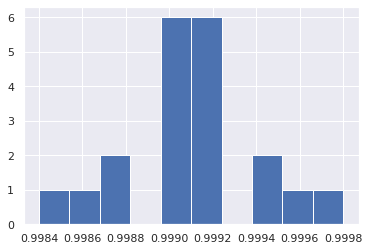

In [33]:
pylab.hist(resultados);

In [34]:
y_prev = modelo.predict(X_valid)
y_prev_prob = modelo.predict_proba(X_valid)

In [35]:
print(f'Relatório de Classificação: \n{classification_report(y_valid, y_prev, digits=4)}')
print(f'Acurácia: {accuracy_score(y_valid, y_prev)}')
print(f'AUC: {roc_auc_score(y_valid, y_prev)}')

Relatório de Classificação: 
              precision    recall  f1-score   support

           0     0.9988    1.0000    0.9994      4836
           1     1.0000    0.9634    0.9814       164

    accuracy                         0.9988      5000
   macro avg     0.9994    0.9817    0.9904      5000
weighted avg     0.9988    0.9988    0.9988      5000

Acurácia: 0.9988
AUC: 0.9817073170731707


💎 A clear conclusion that can be observed regarding this model is that it will make a lot of mistakes if it is generalized, as it took into account the majority class in relation to the minority. To correct, standardization will be performed with the intention of balancing the data

## 🗄️ With the use of Standardization

Using the imblearn library it is possible to easily apply data balancing techniques. In this case, the option in this project was to use Under-sampling, preserving the minority class.

It's easy to see that there is no longer that initial discrepancy (bar graph at the beginning of this notebook).

0    175
1    175
Name: Target, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



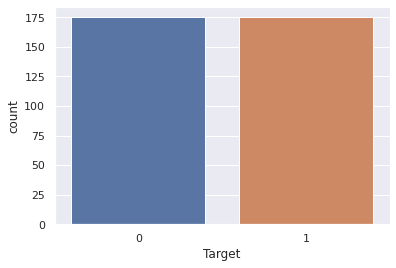

In [36]:
# use under-sampling technique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# see class balancing
print(pd.Series(y_rus).value_counts())

# plot the new class distribution
sns.countplot(y_rus);

With the data balanced, we can see the correlation matrix and identify which variables are most strongly related to each other.

Notice how previously, without data balancing, the correlation matrix didn't bring any relevant information. However, it brings stronger correlations when balanced.

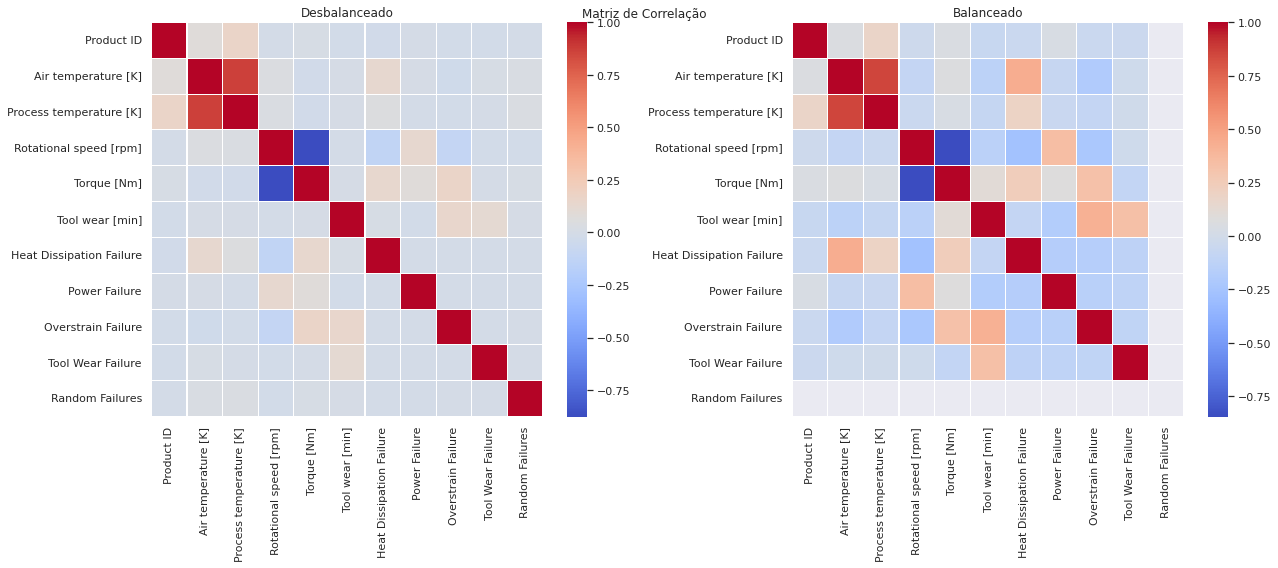

In [37]:
# plot the correlation matrix
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.tight_layout()

With all the data prepared and after a thorough exploratory analysis, I will build a classifier using Logistic Regression.

After instantiating the model, it will be trained on the data in `X_rus` and `y_rus`. Next, predictions will be made on the test data.

In [38]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Validação', linhas_valid.shape[0])
    print()

    X_rus, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_rus, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]


    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_train, y_train)
    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acurácia", acc)

Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9996
Treino 5000
Validação 5000

Acurácia 0.9994
Treino 5000
Validação 5000

Acurácia 0.9994
Treino 5000
Validação 5000

Acurácia 0.999
Treino 5000
Validação 5000

Acurácia 0.9998
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9996
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9996
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9996
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9996
Treino 5000
Validação 5000

Acurácia 0.9992
Treino 5000
Validação 5000

Acurácia 0.9996
Treino 5000
Validação 5000

Acurácia 0.9994
Treino 5000
Validação 5000

Acurácia 0.9994
Treino 5000
Validação 5000

Acurácia 1.0
Treino 5000
Validação 5000

Acurácia 0.9988


In [39]:
# make predictions on test data
y_pred = model.predict(X_valid)
y_proba = model.predict_proba(X_valid)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9988    1.0000    0.9994      4836
           1     1.0000    0.9634    0.9814       164

    accuracy                         0.9988      5000
   macro avg     0.9994    0.9817    0.9904      5000
weighted avg     0.9988    0.9988    0.9988      5000

Acurácia: 0.9988

AUC: 0.9817



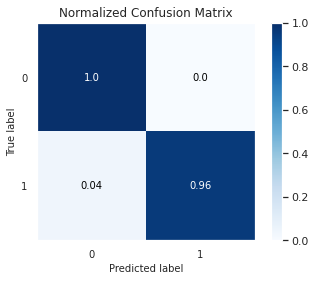

In [40]:
# plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_valid, y_pred, normalize=True)

# print ranking report
print("Relatório de Classificação:\n", classification_report(y_valid, y_pred, digits=4))

# print model accuracy
print("Acurácia: {:.4f}\n".format(accuracy_score(y_valid, y_pred)))

# print the area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_valid, y_pred)))

> With the model trained and predictions made, the performance evaluation begins. In this type of problem, originally unbalanced, accuracy is not a suitable metric, you can **have an accuracy of 99.88%.**
Look at the confusion matrix to see the hit rate for fraudulent transactions, or by the **recall** column of the Ranking Report.
Another metric considered interesting to assess effectiveness is the [AUC ROC, or area under the curve. In the case of this RandomForest model, **there is 98% AUC.**

🏮 As you can see, this is not a trivial problem. Despite the data being well-groomed and clean, with no missing values with some categorical variables, the imbalance and o required considerable work.

Obviously, despite the good final result, there is room to test the performance with other classification algorithms, in addition to optimizing their parameters.